In [1]:
import plotly.graph_objects as go
import numpy as np

# import time
import random
import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_df = pd.read_csv(
    "/home/sofia_afn/Insync/sofiaa720@gmail.com/Google Drive/masters_thesis/code_v1/msc_parking/univrses/data/Kris_updated_v2.csv"
)


FileNotFoundError: [Errno 2] No such file or directory: '/home/sofia_afn/Insync/sofiaa720@gmail.com/Google Drive/masters_thesis/code_v1/msc_parking/univrses/data/Kris_updated_v2.csv'

In [ ]:
data_df

,File_name,Count,Timestamp
0,Kris_0606-2036.png,31.0,2023-06-06 20:36:28
1,Kris_0606-2106.png,28.0,2023-06-06 21:06:47
2,Kris_0606-2137.png,22.0,2023-06-06 21:37:03
3,Kris_0606-2207.png,27.0,2023-06-06 22:07:23
4,Kris_0606-2237.png,26.0,2023-06-06 22:37:39
...,...,...,...
500,Kris_2606-0752.png,32.0,2023-06-26 20:45:19
501,Kris_2606-0817.png,37.0,2023-06-26 20:45:19
502,Kris_2606-0913.png,38.0,2023-06-26 20:45:18
503,Kris_2606-1007.png,31.0,2023-06-26 20:45:18


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   File_name  505 non-null    object 
 1   Count      497 non-null    float64
 2   Timestamp  505 non-null    object 
dtypes: float64(1), object(2)
memory usage: 12.0+ KB


In [ ]:
data_df["Count"].isna().sum()


8

In [ ]:
data_df.dropna(inplace=True)
# data_df.drop(columns=["Unnamed: 0"], inplace=True)


In [ ]:
data_df["File_name"].loc[100].split("-")[0][5:]


'0906'

In [ ]:
data_df["File_name"].loc[100].split("-")[0][5:7]


'09'

In [ ]:
data_df["File_name"].loc[100].split("-")[0][7:9]


'06'

In [ ]:
data_df["File_name"].loc[0].split("-")[1][:4]


'2036'

In [ ]:
data_df["File_name"].loc[0].split("-")[1][:2]
data_df["File_name"].loc[0].split("-")[1][2:4]


'36'

In [ ]:
from datetime import datetime


def extract_timestamp(file_name):
    # Extract the date and time parts from the string
    day = file_name.split("-")[0][5:7]
    month = file_name.split("-")[0][7:9]
    year = "2023"
    hour = file_name.split("-")[1][:2]
    minute = file_name.split("-")[1][2:4]

    # Combine the parts into a string that represents the timestamp
    timestamp_str = f"{day}/{month}/{year} {hour}:{minute}"

    # Convert the string to a datetime object
    timestamp = datetime.strptime(timestamp_str, "%d/%m/%Y %H:%M")

    return timestamp


# Apply the function to the 'File Name' column
data_df["timestamp_true"] = data_df["File_name"].apply(extract_timestamp)
# data_df['timestamp_true'] = pd.to_datetime(data_df['timestamp_true'])

In [ ]:
data_df["Count"] = data_df["Count"].astype("int")


In [ ]:
data_df["num_timestamp"] = data_df["timestamp_true"].apply(lambda x: x.timestamp())

NameError: name 'data_df' is not defined

In [ ]:
data_df.reset_index(inplace=True)

In [ ]:
data_df["month_no"] = data_df["timestamp_true"].dt.month
data_df["month_name"] = data_df["timestamp_true"].dt.month_name()
data_df["day"] = data_df["timestamp_true"].dt.day
data_df["day_of_week"] = data_df["timestamp_true"].dt.dayofweek
data_df["day_of_week_name"] = data_df["timestamp_true"].dt.day_name()
data_df["is_weekend"] = np.where(
    data_df["timestamp_true"].isin(["Sunday", "Saturday"]), 1, 0
)
# data_df['week_no']=  data_df['timestamp_true'].dt.week

In [ ]:
data_df["hour_of_day"] = data_df["timestamp_true"].dt.hour

In [ ]:
data_df.drop(columns=["index"], inplace=True)

In [ ]:
data_df


,File_name,Count,Timestamp,timestamp_true,num_timestamp,month_no,month_name,day,day_of_week,day_of_week_name,is_weekend,hour_of_day
0,Kris_0606-2036.png,31,2023-06-06 20:36:28,2023-06-06 20:36:00,1.686084e+09,6,June,6,1,Tuesday,0,20
1,Kris_0606-2106.png,28,2023-06-06 21:06:47,2023-06-06 21:06:00,1.686086e+09,6,June,6,1,Tuesday,0,21
2,Kris_0606-2137.png,22,2023-06-06 21:37:03,2023-06-06 21:37:00,1.686087e+09,6,June,6,1,Tuesday,0,21
3,Kris_0606-2207.png,27,2023-06-06 22:07:23,2023-06-06 22:07:00,1.686089e+09,6,June,6,1,Tuesday,0,22
4,Kris_0606-2237.png,26,2023-06-06 22:37:39,2023-06-06 22:37:00,1.686091e+09,6,June,6,1,Tuesday,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...
492,Kris_2606-0752.png,32,2023-06-26 20:45:19,2023-06-26 07:52:00,1.687766e+09,6,June,26,0,Monday,0,7
493,Kris_2606-0817.png,37,2023-06-26 20:45:19,2023-06-26 08:17:00,1.687767e+09,6,June,26,0,Monday,0,8
494,Kris_2606-0913.png,38,2023-06-26 20:45:18,2023-06-26 09:13:00,1.687771e+09,6,June,26,0,Monday,0,9
495,Kris_2606-1007.png,31,2023-06-26 20:45:18,2023-06-26 10:07:00,1.687774e+09,6,June,26,0,Monday,0,10


In [ ]:
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   File_name         497 non-null    object        
 1   Count             497 non-null    int64         
 2   Timestamp         497 non-null    object        
 3   timestamp_true    497 non-null    datetime64[ns]
 4   num_timestamp     497 non-null    float64       
 5   month_no          497 non-null    int32         
 6   month_name        497 non-null    object        
 7   day               497 non-null    int32         
 8   day_of_week       497 non-null    int32         
 9   day_of_week_name  497 non-null    object        
 10  is_weekend        497 non-null    int64         
 11  hour_of_day       497 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(4), int64(2), object(4)
memory usage: 39.0+ KB


In [ ]:
hour_grouped = data_df.groupby("hour_of_day")["Count"].agg(["mean", "std"])

In [ ]:
hour_grouped


,mean,std
hour_of_day,,
0,33.650000,11.084722
1,32.450000,11.758424
2,31.428571,11.672923
3,28.315789,11.010362
4,26.833333,10.517492
5,28.105263,10.660909
6,26.526316,9.506538
7,25.750000,10.135269
8,30.368421,10.467996


<Axes: xlabel='hour_of_day'>

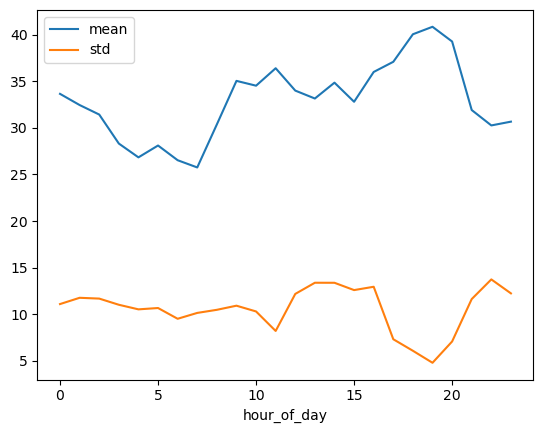

In [ ]:
hour_grouped.plot()


In [ ]:
data_df.to_csv(
    "/home/sofia_afn/Insync/sofiaa720@gmail.com/Google Drive/masters_thesis/code_v1/msc_parking/univrses/data/Kris_data_preprocessed.csv"
)

In [ ]:
data_train_df = data_df[:350]
data_test_df = data_df[351:]
# data_train_df['timestamp_true']= data_train_df['timestamp_true'].apply(lambda x: x.timestamp())


In [ ]:
data_df.head()


,File_name,Count,Timestamp,timestamp_true,num_timestamp,month_no,month_name,day,day_of_week,day_of_week_name,is_weekend,hour_of_day
0,Kris_0606-2036.png,31,2023-06-06 20:36:28,2023-06-06 20:36:00,1.686084e+09,6,June,6,1,Tuesday,0,20
1,Kris_0606-2106.png,28,2023-06-06 21:06:47,2023-06-06 21:06:00,1.686086e+09,6,June,6,1,Tuesday,0,21
2,Kris_0606-2137.png,22,2023-06-06 21:37:03,2023-06-06 21:37:00,1.686087e+09,6,June,6,1,Tuesday,0,21
3,Kris_0606-2207.png,27,2023-06-06 22:07:23,2023-06-06 22:07:00,1.686089e+09,6,June,6,1,Tuesday,0,22
4,Kris_0606-2237.png,26,2023-06-06 22:37:39,2023-06-06 22:37:00,1.686091e+09,6,June,6,1,Tuesday,0,22


In [ ]:
data_train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   File_name         350 non-null    object        
 1   Count             350 non-null    int64         
 2   Timestamp         350 non-null    object        
 3   timestamp_true    350 non-null    datetime64[ns]
 4   num_timestamp     350 non-null    float64       
 5   month_no          350 non-null    int32         
 6   month_name        350 non-null    object        
 7   day               350 non-null    int32         
 8   day_of_week       350 non-null    int32         
 9   day_of_week_name  350 non-null    object        
 10  is_weekend        350 non-null    int64         
 11  hour_of_day       350 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(4), int64(2), object(4)
memory usage: 27.5+ KB


In [ ]:
data_test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 351 to 496
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   File_name         146 non-null    object        
 1   Count             146 non-null    int64         
 2   Timestamp         146 non-null    object        
 3   timestamp_true    146 non-null    datetime64[ns]
 4   num_timestamp     146 non-null    float64       
 5   month_no          146 non-null    int32         
 6   month_name        146 non-null    object        
 7   day               146 non-null    int32         
 8   day_of_week       146 non-null    int32         
 9   day_of_week_name  146 non-null    object        
 10  is_weekend        146 non-null    int64         
 11  hour_of_day       146 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(4), int64(2), object(4)
memory usage: 11.5+ KB


In [ ]:
# Create a scatter plot for the original data
trace1 = go.Scatter(
    x=data_train_df["num_timestamp"],
    y=data_train_df["Count"],
    mode="markers",
    name="Original Data",
)

# Create a scatter plot for the samples
trace2 = go.Scatter(
    x=data_test_df["num_timestamp"],
    y=data_test_df["Count"],
    mode="markers",
    name="Sample Data",
)

# Combine the two plots
data = [trace1, trace2]


# Create a layout
layout = go.Layout(
    title="Original Data vs Sample Data",
    xaxis=dict(title="Timestamp"),
    yaxis=dict(title="Count"),
)

# Create a Figure and plot it
fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
# Create a scatter plot for the original data
trace1 = go.Scatter(
    x=data_train_df["hour_of_day"],
    y=data_train_df["Count"],
    mode="markers",
    name="Original Data",
)

# Create a scatter plot for the samples
trace2 = go.Scatter(
    x=data_test_df["hour_of_day"],
    y=data_test_df["Count"],
    mode="markers",
    name="Sample Data",
)

# Combine the two plots
data = [trace1, trace2]


# Create a layout
layout = go.Layout(
    title="Original Data vs Sample Data",
    xaxis=dict(title="hour_of_day"),
    yaxis=dict(title="Count"),
)

# Create a Figure and plot it
fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
# Create a scatter plot for the samples
trace3 = go.Scatter(
    x=data_test_df["hour_of_day"],
    y=data_test_df["Count"],
    mode="markers",
    name="Sample Data",
)

# Combine the two plots
data = [trace3]


# Create a layout
layout = go.Layout(
    title="Sample Data",
    xaxis=dict(title="hour_of_day"),
    yaxis=dict(title="Count"),
)

# Create a Figure and plot it
fig = go.Figure(data=data, layout=layout)
fig.show()


In [ ]:
# Create a scatter plot for the samples
trace4 = go.Scatter(
    x=data_test_df["day"],
    y=data_test_df["Count"],
    mode="markers",
    name="Sample Data",
)

# Combine the two plots
data = [trace4]


# Create a layout
layout = go.Layout(
    title="Day sample data",
    xaxis=dict(title="day"),
    yaxis=dict(title="Count"),
)

# Create a Figure and plot it
fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=data_df["timestamp_true"], y=data_df["Count"], mode="lines", name="Count"
    )
)
fig.update_layout(title="Time Series Plot", xaxis_title="Time", yaxis_title="Count")
fig.show()

In [ ]:
# Group by month and calculate average
monthly_data = data_df.groupby("day_of_week_name")["Count"].mean().reset_index()

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=monthly_data["day_of_week_name"],
        y=monthly_data["Count"],
        mode="lines",
        name="Count",
    )
)
fig.update_layout(
    title="Seasonality Plot - Week", xaxis_title="Month", yaxis_title="Average Count"
)
fig.show()

In [ ]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import RBF

# Define the kernel for GPR
kernel_rq = RationalQuadratic(length_scale=1.0, alpha=1.0)  # Rational Quadratic kernel
kernel_rbf = RBF(length_scale=1.0)

In [ ]:
data_train_df["num_timestamp"].iloc[10]

1686101940.0

In [ ]:
data_train_df


,File_name,Count,Timestamp,timestamp_true,num_timestamp,month_no,month_name,day,day_of_week,day_of_week_name,is_weekend,hour_of_day
0,Kris_0606-2036.png,31,2023-06-06 20:36:28,2023-06-06 20:36:00,1.686084e+09,6,June,6,1,Tuesday,0,20
1,Kris_0606-2106.png,28,2023-06-06 21:06:47,2023-06-06 21:06:00,1.686086e+09,6,June,6,1,Tuesday,0,21
2,Kris_0606-2137.png,22,2023-06-06 21:37:03,2023-06-06 21:37:00,1.686087e+09,6,June,6,1,Tuesday,0,21
3,Kris_0606-2207.png,27,2023-06-06 22:07:23,2023-06-06 22:07:00,1.686089e+09,6,June,6,1,Tuesday,0,22
4,Kris_0606-2237.png,26,2023-06-06 22:37:39,2023-06-06 22:37:00,1.686091e+09,6,June,6,1,Tuesday,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...
345,Kris_1906-1453.png,54,2023-06-26 13:17:17,2023-06-19 14:53:00,1.687186e+09,6,June,19,0,Monday,0,14
346,Kris_1906-1542.png,36,2023-06-26 13:16:19,2023-06-19 15:42:00,1.687189e+09,6,June,19,0,Monday,0,15
347,Kris_1906-1612.png,44,2023-06-26 13:15:34,2023-06-19 16:12:00,1.687191e+09,6,June,19,0,Monday,0,16
348,Kris_1906-1622.png,45,2023-06-25 20:35:10,2023-06-19 16:22:00,1.687192e+09,6,June,19,0,Monday,0,16


<Axes: xlabel='num_timestamp'>

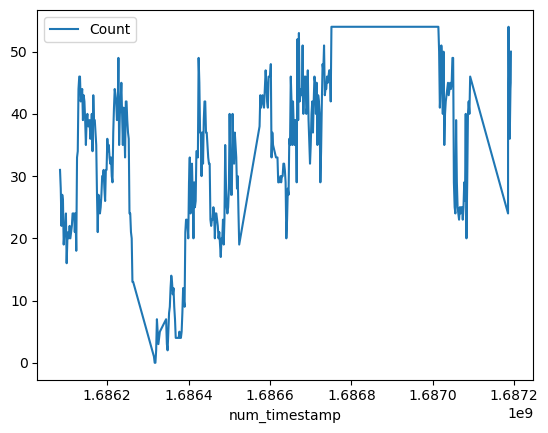

In [ ]:
data_train_df.plot(x="num_timestamp", y="Count")

In [ ]:
# from sklearn.model_selection import train_test_split

# # Assuming df is your DataFrame
# X = data_train_df[['num_timestamp']]  # Features - note the double brackets to make it a DataFrame
# y = data_train_df['Count']  # Target variable

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = data_train_df["num_timestamp"].values.reshape(-1, 1)
X_train

array([[1.68608376e+09],
       [1.68608556e+09],
       [1.68608742e+09],
       [1.68608922e+09],
       [1.68609102e+09],
       [1.68609282e+09],
       [1.68609468e+09],
       [1.68609648e+09],
       [1.68609828e+09],
       [1.68610008e+09],
       [1.68610194e+09],
       [1.68610374e+09],
       [1.68610554e+09],
       [1.68610740e+09],
       [1.68610920e+09],
       [1.68611100e+09],
       [1.68611286e+09],
       [1.68611466e+09],
       [1.68611646e+09],
       [1.68611826e+09],
       [1.68612012e+09],
       [1.68612192e+09],
       [1.68612372e+09],
       [1.68612558e+09],
       [1.68612738e+09],
       [1.68612918e+09],
       [1.68613104e+09],
       [1.68613284e+09],
       [1.68613464e+09],
       [1.68613644e+09],
       [1.68613830e+09],
       [1.68614010e+09],
       [1.68614190e+09],
       [1.68614376e+09],
       [1.68614556e+09],
       [1.68614736e+09],
       [1.68614922e+09],
       [1.68615102e+09],
       [1.68615282e+09],
       [1.68615462e+09],


In [ ]:
type(X_train)


numpy.ndarray

In [ ]:
y_train = data_train_df["Count"].values.reshape(-1, 1)
y_train

array([[31],
       [28],
       [22],
       [27],
       [26],
       [19],
       [21],
       [22],
       [24],
       [16],
       [20],
       [21],
       [20],
       [22],
       [20],
       [21],
       [22],
       [24],
       [24],
       [24],
       [21],
       [24],
       [18],
       [33],
       [34],
       [44],
       [46],
       [46],
       [42],
       [43],
       [44],
       [39],
       [43],
       [42],
       [39],
       [35],
       [39],
       [40],
       [38],
       [38],
       [39],
       [36],
       [37],
       [40],
       [34],
       [43],
       [39],
       [39],
       [37],
       [35],
       [27],
       [21],
       [27],
       [26],
       [24],
       [25],
       [27],
       [30],
       [30],
       [31],
       [28],
       [26],
       [31],
       [31],
       [36],
       [34],
       [35],
       [33],
       [32],
       [33],
       [30],
       [29],
       [37],
       [41],
       [44],
       [43],
       [42],

In [ ]:
X_test = data_test_df["num_timestamp"].values.reshape(-1, 1)
X_test

array([[1.68719460e+09],
       [1.68719472e+09],
       [1.68719712e+09],
       [1.68719802e+09],
       [1.68719964e+09],
       [1.68720222e+09],
       [1.68720582e+09],
       [1.68720588e+09],
       [1.68720636e+09],
       [1.68720684e+09],
       [1.68720912e+09],
       [1.68721086e+09],
       [1.68721236e+09],
       [1.68721446e+09],
       [1.68721716e+09],
       [1.68721824e+09],
       [1.68721992e+09],
       [1.68722226e+09],
       [1.68722406e+09],
       [1.68722718e+09],
       [1.68722886e+09],
       [1.68722922e+09],
       [1.68722940e+09],
       [1.68723030e+09],
       [1.68723372e+09],
       [1.68723726e+09],
       [1.68724044e+09],
       [1.68724224e+09],
       [1.68724392e+09],
       [1.68724572e+09],
       [1.68724902e+09],
       [1.68725028e+09],
       [1.68725184e+09],
       [1.68725238e+09],
       [1.68725262e+09],
       [1.68725292e+09],
       [1.68725304e+09],
       [1.68725382e+09],
       [1.68725466e+09],
       [1.68725520e+09],


In [ ]:
y_test = data_test_df["Count"].values.reshape(-1, 1)
y_test

array([[47],
       [34],
       [37],
       [40],
       [38],
       [39],
       [40],
       [37],
       [42],
       [43],
       [43],
       [45],
       [45],
       [52],
       [43],
       [41],
       [40],
       [36],
       [43],
       [39],
       [42],
       [40],
       [42],
       [42],
       [41],
       [41],
       [40],
       [38],
       [40],
       [31],
       [36],
       [38],
       [43],
       [41],
       [41],
       [43],
       [42],
       [35],
       [36],
       [39],
       [38],
       [42],
       [36],
       [38],
       [40],
       [41],
       [38],
       [48],
       [48],
       [52],
       [36],
       [33],
       [43],
       [43],
       [42],
       [36],
       [53],
       [45],
       [54],
       [51],
       [23],
       [32],
       [32],
       [32],
       [26],
       [32],
       [32],
       [29],
       [26],
       [29],
       [35],
       [37],
       [34],
       [33],
       [41],
       [34],
       [52],

In [ ]:
def gpr_train(kernel, x_train, y_train, x_test):
    # Create the GPR model
    gpr = GaussianProcessRegressor(kernel=kernel)
    # Fit the GPR model to the training data
    gpr.fit(x_train, y_train)

    # Perform predictions using the trained GPR model
    y_pred, y_std = gpr.predict(x_test, return_std=True)
    # y_pred: Predicted target values
    # y_std: Standard deviation of predictions

    # Access learned model properties
    kernel_params = gpr.kernel_  # Learned kernel parameters
    # noise_level = gpr.kernel_.get_params()['k2_noise_level']  # Estimated noise level (if available)
    noise_level = gpr.alpha_  # Estimated noise level (if available)

    # Print or analyze the results as needed
    print("Predicted values:", y_pred)
    print("Prediction uncertainty (std):", y_std)
    print("Learned kernel parameters:", kernel_params)
    print("Estimated noise level:", noise_level)

    return y_pred, y_std, kernel_params, noise_level

In [ ]:
import plotly.graph_objects as go


def plot_gpr_results_plotly(X_train, y_train, X_test, y_pred, y_std):
    # Convert X_test and X_train to flat arrays for plotting
    X_test_flat = X_test.flatten()
    X_train_flat = X_train.flatten()

    # Create a figure
    fig = go.Figure()

    # Add the training data trace
    fig.add_trace(
        go.Scatter(x=X_train_flat, y=y_train, mode="markers", name="Training data")
    )

    # Add the predicted values trace
    fig.add_trace(
        go.Scatter(x=X_test_flat, y=y_pred, mode="lines", name="Predicted values")
    )

    # Add the uncertainty bounds traces
    fig.add_trace(
        go.Scatter(
            x=X_test_flat,
            y=y_pred - y_std,
            mode="lines",
            name="Lower bound",
            line=dict(width=0),
        )
    )
    fig.add_trace(
        go.Scatter(
            x=X_test_flat,
            y=y_pred + y_std,
            mode="lines",
            name="Upper bound",
            fill="tonexty",
        )
    )

    # Show the plot
    fig.show()

In [ ]:
y_pred, y_std, kernel_params, noise_level = gpr_train(
    kernel_rq, X_train, y_train, X_test
)

Predicted values: [39.01572173 38.91134432 37.49604381 37.14398326 36.63077499 36.0100841
 35.37064132 35.3614806  35.28960022 35.22009871 34.91806031 34.7134309
 34.5515116  34.34352601 34.10240669 34.01292262 33.88054194 33.70833556
 33.58428161 33.38404571 33.28301677 33.26192657 33.25145242 33.19977287
 33.01310576 32.83410979 32.68383545 32.60266694 32.52922417 32.45284832
 32.31853181 32.26905005 32.20907126 32.18862802 32.17959337 32.16834388
 32.16385762 32.13488297 32.10403344 32.08439099 32.03911919 31.94256939
 31.91998917 31.88748022 31.86135232 31.75928705 31.69643813 31.60021977
 31.58028597 31.53372715 31.50545491 31.40527716 31.32330754 31.23560024
 31.22442288 31.15668721 31.11494329 31.07529765 30.98578493 30.96090484
 26.92125373 26.9032981  26.90016486 26.89658728 26.87208522 26.85260048
 26.84245623 26.83541583 26.82575725 26.80651588 26.78087201 26.76617503
 26.75712676 26.73310636 26.71264166 26.70329995 26.69525118 26.6745748
 26.65025014 26.64732526 26.63981483

In [ ]:
y_pred


array([39.01572173, 38.91134432, 37.49604381, 37.14398326, 36.63077499,
       36.0100841 , 35.37064132, 35.3614806 , 35.28960022, 35.22009871,
       34.91806031, 34.7134309 , 34.5515116 , 34.34352601, 34.10240669,
       34.01292262, 33.88054194, 33.70833556, 33.58428161, 33.38404571,
       33.28301677, 33.26192657, 33.25145242, 33.19977287, 33.01310576,
       32.83410979, 32.68383545, 32.60266694, 32.52922417, 32.45284832,
       32.31853181, 32.26905005, 32.20907126, 32.18862802, 32.17959337,
       32.16834388, 32.16385762, 32.13488297, 32.10403344, 32.08439099,
       32.03911919, 31.94256939, 31.91998917, 31.88748022, 31.86135232,
       31.75928705, 31.69643813, 31.60021977, 31.58028597, 31.53372715,
       31.50545491, 31.40527716, 31.32330754, 31.23560024, 31.22442288,
       31.15668721, 31.11494329, 31.07529765, 30.98578493, 30.96090484,
       26.92125373, 26.9032981 , 26.90016486, 26.89658728, 26.87208522,
       26.85260048, 26.84245623, 26.83541583, 26.82575725, 26.80

In [ ]:
plot_gpr_results_plotly(X_train, y_train, X_test, y_pred, y_std)


In [ ]:
# Dummy data
X_train = np.array([1, 2, 3, 4, 5])
y_train = np.array([2, 3, 4, 5, 6])
X_test = np.array([6, 7, 8, 9, 10])
y_pred = np.array([7, 8, 9, 10, 11])
y_std = np.array([0.5, 0.5, 0.5, 0.5, 0.5])

# Plot
plot_gpr_results_plotly(X_train, y_train, X_test, y_pred, y_std)